# Weather Prediction

We have a sample weather dataset of JFK airport available since 1970. Some objectives include:
- Cleaning the data
- Train a machine learning model to make historical and future predictions.

Import the data with the ```DATE``` column as index. ```DATE``` column 
gives each row a unique identifier so each row is is going to be referred to by date.

In [1]:
import pandas as pd

weather = pd.read_csv("/kaggle/input/jfk-weather/jfk_weather.csv", index_col="DATE")

weather.head()

,STATION,NAME,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT21,WT22,WV01
DATE,,,,,,,,,,,,,,,,,,,,,
01-01-1970,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",80.0,90.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02-01-1970,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",30.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03-01-1970,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",80.0,100.0,NaN,NaN,NaN,0.02,0.0,0.0,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
04-01-1970,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
05-01-1970,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",30.0,10.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


You might see a lot of ```Nan``` values. Machine learning models will not work with missing values. So the first data cleaning needs to be done. We can get rid of our columns that have missing values. We can calculate the null percentage in the data which basically applies a function ```pd.isnull```
the weather data frame.

In [2]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]  #sum of missing values in the column by divided by the number of rows
null_pct

STATION    0.000000
NAME       0.000000
ACMH       0.502715
ACSH       0.502664
AWND       0.264650
FMTM       0.476390
PGTM       0.365451
PRCP       0.000000
SNOW       0.000000
SNWD       0.000052
TAVG       0.678769
TMAX       0.000000
TMIN       0.000000
TSUN       0.998397
WDF1       0.502922
WDF2       0.497492
WDF5       0.501784
WDFG       0.735144
WDFM       0.999948
WESD       0.686010
WSF1       0.502767
WSF2       0.497492
WSF5       0.501836
WSFG       0.614016
WSFM       0.999948
WT01       0.630308
WT02       0.935040
WT03       0.933437
WT04       0.982622
WT05       0.981174
WT06       0.990639
WT07       0.994414
WT08       0.797259
WT09       0.992759
WT11       0.999276
WT13       0.886993
WT14       0.954125
WT15       0.997828
WT16       0.659840
WT17       0.996897
WT18       0.939643
WT21       0.999741
WT22       0.997466
WV01       0.999948
dtype: float64

Some of the reasons for missing data can be due to malfunctioning errors and human errors while noting down the data. We can clean up the data by removing columns that have a null percentage less than 5% and we'll index those columns in a new column called ```valid_columns```.

In [3]:
valid_columns = weather.columns[null_pct < .05]
valid_columns

Index(['STATION', 'NAME', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN'], dtype='object')

In order to avoid getting an error later, we can assign the data frame a slice of the data frame back itself by using the ```.copy()``` method.

In [4]:
weather = weather[valid_columns].copy()
weather.columns = weather.columns.str.lower()  #lower case the column names
weather

,station,name,prcp,snow,snwd,tmax,tmin
DATE,,,,,,,
01-01-1970,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22
02-01-1970,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22
03-01-1970,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25
04-01-1970,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23
05-01-1970,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21
...,...,...,...,...,...,...,...
04-12-2022,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,47,37
05-12-2022,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,47,30
06-12-2022,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.43,0.0,0.0,57,36


We can forward fill the missing snow depth using the last value of snow depth because it makes sense that yesterday's snow depth will be equal to today's snow depth.

In [5]:
weather = weather.ffill()

Let's look at how many missing values there are in each column

In [6]:
weather.apply(pd.isnull).sum()

station    0
name       0
prcp       0
snow       0
snwd       0
tmax       0
tmin       0
dtype: int64

We can see none of our columns have missing values now which is perfect that's what we need for machine learning.

The next thing required for maching learning is that the data in the columns are the correct data types.

In [7]:
weather.dtypes

station     object
name        object
prcp       float64
snow       float64
snwd       float64
tmax         int64
tmin         int64
dtype: object

So pandas columns can be of different data types. An ```object``` data type usually indicates that the column is a string and in this case station, name columns are a string. So these two columns are are stored as objects and that's actually correct. Sometimes columns are incorrectly sorted as objects and we will have to convert them to a numeric type. In this case we don't and we can see that these other columns are also stored as the correct type,

We also want to check our index which are those row labels to make sure it's the correct type.

In [8]:
weather.index

Index(['01-01-1970', '02-01-1970', '03-01-1970', '04-01-1970', '05-01-1970',
       '06-01-1970', '07-01-1970', '08-01-1970', '09-01-1970', '10-01-1970',
       ...
       '29-11-2022', '30-11-2022', '01-12-2022', '02-12-2022', '03-12-2022',
       '04-12-2022', '05-12-2022', '06-12-2022', '07-12-2022', '08-12-2022'],
      dtype='object', name='DATE', length=19335)

We can see that our index is stored as an object but it's actually a date and if we convert it to a date it makes some of the processing we're going to do later easier. 
Let's convert our index to a date time - we'll take ```weather.index``` and then we're going to use the ```pandas.to_datetime``` function to actually convert our index into a ```datetime```. We pass in our index and it's going to convert it from an ```object``` into a ```datetime```.


In [9]:
weather.index = pd.to_datetime(weather.index)
weather.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '2022-11-29', '2022-11-30', '2022-01-12', '2022-02-12',
               '2022-03-12', '2022-04-12', '2022-05-12', '2022-06-12',
               '2022-07-12', '2022-08-12'],
              dtype='datetime64[ns]', name='DATE', length=19335, freq=None)

On looking at the index again and we can see it's now stored as a ```datetime```. It doesn't look any different but how pandas is handling it internally is different. We can now perform useful operations like getting the year component of the date.

In [10]:
weather.index.year

Int64Index([1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970,
            ...
            2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
           dtype='int64', name='DATE', length=19335)

One last just check of our data before we continue and actually jump into machine learning is we're going to make sure that we don't have any gaps in our data. To do this we're going to count up how many rows we have for each year and then we're going to sort that by our our year. So ```value_counts``` will count up how many times each unique value occurs here.


In [11]:
weather.index.year.value_counts().sort_index()

1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1981    365
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    342
Name: DATE, dtype: int64

It doesn't look like we have any gaps or other issues. If you used your local weather data you may actually have some gaps and in which case it's usually okay if you have some gaps. But just something to keep in mind if you have too many gaps you may not be able to make any predictions. 
Just to take another look at gaps and make sure there's nothing weird going on we can actually plot some of our columns. So this is the snow depth column so that's how much snow has accumulated on the ground for that day and then we can use the ```.plot()``` method to actually create a bar plot showing snow depth by day.

<AxesSubplot:xlabel='DATE'>

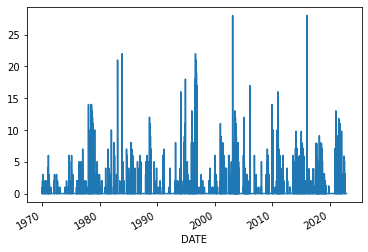

In [12]:
weather["snwd"].plot()

In [13]:
weather

,station,name,prcp,snow,snwd,tmax,tmin
DATE,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22
1970-02-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22
1970-03-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25
1970-04-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23
1970-05-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21
...,...,...,...,...,...,...,...
2022-04-12,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,47,37
2022-05-12,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,47,30
2022-06-12,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.43,0.0,0.0,57,36


When we use a machine learning algorithm we need to tell the algorithm what we're trying to predict and in our case what we're trying to predict is tomorrow's temperature - ```T-Max``` using today's information. We'll create a ```target``` column in our weather dataframe and use ```.shift()``` method to keep the same index but it pulls the values from the next row back.


In [14]:
weather["target"] = weather.shift(-1)["tmax"]
weather

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,31.0
1970-02-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,38.0
1970-03-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,31.0
1970-04-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,35.0
1970-05-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,36.0
...,...,...,...,...,...,...,...,...
2022-04-12,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,47,37,47.0
2022-05-12,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,47,30,57.0
2022-06-12,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.43,0.0,0.0,57,36,57.0


We can see we now have a Target column and it is tomorrow's ```T-Max``` so for January 1st 1970 the target is 31 and that is tomorrow's maximum temperature January 2nd which is 31. So you can see this helps us use all of this data to predict tomorrow's temperature which is the target.

Now you may notice a little issue with the last value here it's missing because we don't have data for December 8th. It's actually missing right we don't have a value to pull back to know tomorrow's temperature so if we made a prediction for this row we would actually be predicting data that we don't have we'd be predicting the future so typically you want to handle this in a different way but just to make things easier and to make it easy to get future predictions what I'm going to do is I'm going to use ```ffill``` again. We're going to pull the temperature the target from the last row forward by using ```ffill```.

In [15]:
weather = weather.ffill()
weather

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,31.0
1970-02-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,38.0
1970-03-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,31.0
1970-04-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,35.0
1970-05-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,36.0
...,...,...,...,...,...,...,...,...
2022-04-12,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,47,37,47.0
2022-05-12,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,47,30,57.0
2022-06-12,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.43,0.0,0.0,57,36,57.0


We can see that we filled in yesterday's value to be the target here it's going to cause a very very tiny issue that's not going to make a difference to us right this row has a Target that that's actually not correct but because we have 20 000 rows of data this one robe having an incorrect Target is not going to make a huge difference and it'll make it a little bit easier for us to make future predictions so that's why I'm using fill there even though it's not technically correct it's not really going to cause a problem.

We're going to apply a ridge regression model. You can check for collinearity by using the ```.corr()``` method and this will actually find the correlations between the various columns.

In [16]:
from sklearn.linear_model import Ridge

In [17]:
weather.corr()

,prcp,snow,snwd,tmax,tmin,target
prcp,1.000000,0.151036,0.001223,-0.007102,0.052368,-0.003275
snow,0.151036,1.000000,0.232600,-0.174937,-0.159138,-0.172596
snwd,0.001223,0.232600,1.000000,-0.259645,-0.256740,-0.240846
tmax,-0.007102,-0.174937,-0.259645,1.000000,0.955414,0.915158
tmin,0.052368,-0.159138,-0.256740,0.955414,1.000000,0.915302
target,-0.003275,-0.172596,-0.240846,0.915158,0.915302,1.000000


We can see that precipitation is pretty uncorrelated from most of the columns and it's slightly correlated to snow. ```tmax``` and ```tmin``` are pretty correlated which makes sense and the target is pretty correlated with ```tmax``` and ```tmin``` which also makes sense that tomorrow's temperature is pretty correlated to today's temperature.

We'll apply a [ridge regression machine learning model](https://en.wikipedia.org/wiki/Ridge_regression#:~:text=Ridge%20regression%20is%20a%20method%20of%20estimating%20the,uses%20in%20fields%20including%20econometrics%2C%20chemistry%2C%20and%20engineering.) which works very similarly to linear regression except it penalizes coefficients to account for multi-collinearity. Ridge regression to some extent helps adjust for collinearity. 

Import Ridge Regression from scikit-learn and initialize the model. The alpha parameter controls how much the coefficients are shrunk to account for collinearity. It's worth experimenting by setting alpha to different values. 0.1 is a good default value so we initialize our Ridge 
regression model and then the ridge regression model can be applied.

In [18]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=.1)

We need to create a list of predictor columns to predict our target and to get that we're going to again index our list of columns.

In [19]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]
predictors

Index(['prcp', 'snow', 'snwd', 'tmax', 'tmin'], dtype='object')

So we can take a look at predictors and we can see this is our list of predictors. We also have the time series data where January 1st is linked to our data from January 2nd.

Typically when you try to estimate the error of a machine learning model you can use cross-validation except with time series data. With time series data we need to be really careful not to use future data to predict the past. So we need to actually use a special technique called back testing or time series cross-validation to account for the time series nature of the data. 

So we're going to write a function called ```backtest``` and this function is going to take in our weather data frame, our ridge regression model and our list of predictors. It's also going to define a start parameter, ```start=3650```, so this is how much data we want to take - 10 years of data before we start making predictions and then we're going to define a step, ```step=90```, whichs means that every 90 days we'll create a set of predictions and then move on to the next 90 days and then the next 90 days so this is going to generate predictions for our entire set of data except the first 10 years so we're going to have predictions from 1980 all the way through 2022 and the predictions will be will respect the order of the data.

So first thing we're going to create a list called ```all_predictions``` and each element in this list is going to be a data frame that has predictions for 90 days. Then we're going to write a ```for``` loop where we say that for ```i``` in range and we're going to start with our start parameter which is 3650 we're going to go up to ```weather.shape[0]``` which is the end of our data set and then we are going to advance 90 each time then work at each iteration. We're going to create a training set so the training set is the data we use to train our machine learning model and this is going to be all of the rows in our data up to row ```i``` and then we're going to create a test set which is going to be ```i``` up to ```i+step```. So this is going to take all of the data that comes before the current row to use as our training data and then this is going to take the next 90 days to make predictions on then we're going to go ahead and fit our model scikit-learn makes this really easy we just call ```model.fit``` and then we pass in our predictors so our predictors are what we're using to actually make our judgments and then we're going to pass in our ```target``` and our ```target``` is what we're trying to predict.

In [20]:
def backtest(weather, model, predictors, start=3650, step=90):
    all_predictions = []
    
    for i in range(start, weather.shape[0], step):    #weather.shape[0] represents end of the dataset
        train = weather.iloc[:i,:]             #create an iteration at each 
                                               #training set for all of the rows upto row i
        test = weather.iloc[i:(i+step),:]      #test set takes the next 90 days
        
        model.fit(train[predictors], train["target"])    #use the scikit learn to fit the
                                                         #ridge regression to the data
        preds = model.predict(test[predictors])          #generate the predictions using scikit learn
        preds = pd.Series(preds, index=test.index)       #convert the predictions into a pandas series
        combined = pd.concat([test["target"], preds], axis=1)   #concatenate the real test data with the predictions data
                                                                #axis=1 treats each of the targets as a separate column in a single df
        combined.columns = ["actual", "prediction"]             #name the columns
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()    #take the absolute value of the difference
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

Make prediction by calling the function.

In [21]:
predictions = backtest(weather, rr, predictors)
predictions

,actual,prediction,diff
DATE,,,
1979-12-30,43.0,50.229324,7.229324
1979-12-31,42.0,43.673798,1.673798
1980-01-01,41.0,41.579150,0.579150
1980-02-01,36.0,43.961887,7.961887
1980-03-01,30.0,40.204726,10.204726
...,...,...,...
2022-04-12,47.0,49.901241,2.901241
2022-05-12,57.0,46.282630,10.717370
2022-06-12,57.0,53.330679,3.669321


We can take a look at our predictions and we can see that we skipped the first 10 years because we use 10 years of data to make our first set of predictions but we have predictions from the end of 1979 onwards through to 2022.

In order to figure out how good our predictions were, generate an accuracy metric. The metric we're going to use is mean absolute error. It's basically just taking this diff column and finding the average.

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(predictions["actual"], predictions["prediction"])

5.140877250169638

It means on average we were five degrees off from the correct temperature on average it means about half the time we were further off half the time we were we were closer so not great accuracy I mean five degrees Fahrenheit isn't a huge error but we can do better.

In [23]:
predictions["diff"].mean()

5.140877250169638

The way we're going to improve our accuracy is by calculating the average temperature and precipitation in the past few days so the past three days and the past 14 days and looking at how the current day compares to those days.

In [24]:
def pct_diff(old, new):     #define a function to calculate percent_difference
    return (new - old) / old

def compute_rolling(weather, horizon, col):     #calculate rolling averages for the past few periods
                                                #horizon is the no. of days you want to calculate rolling average for
    label = f"rolling_{horizon}_{col}"          #label for the new column
    weather[label] = weather[col].rolling(horizon).mean()    #create a new column that contains the 14 day rolling average
    weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])    #find the difference between the current day 
                                                                        #and the rolling
    return weather
    
rolling_horizons = [3, 14]     #run it for a 3-day horizon and 14-day horizon
for horizon in rolling_horizons:
    for col in ["tmax", "tmin", "prcp"]:
        weather = compute_rolling(weather, horizon, col)
        
weather

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-02-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-03-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,31.0,32.333333,0.175258,23.000000,0.086957,0.006667,2.000000,NaN,NaN,NaN,NaN,NaN,NaN
1970-04-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,35.0,33.333333,-0.070000,23.333333,-0.014286,0.006667,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
1970-05-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,36.0,34.666667,0.009615,23.000000,-0.086957,0.006667,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-12,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,47,37,47.0,49.666667,-0.053691,37.333333,-0.008929,0.076667,-1.000000,51.785714,-0.092414,37.000000,0.000000,0.082143,-1.000000
2022-05-12,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,47,30,57.0,50.333333,-0.066225,37.000000,-0.189189,0.076667,-1.000000,52.142857,-0.098630,37.142857,-0.192308,0.082143,-1.000000
2022-06-12,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.43,0.0,0.0,57,36,57.0,50.333333,0.132450,34.333333,0.048544,0.143333,2.000000,52.642857,0.082768,37.071429,-0.028902,0.112857,2.810127


You can see there's a few missing values so the reason for this is if we're finding a 14-day rolling average for these dates we don't have 14 days of historical data to compute a rolling average. Our data started on January 1st 1970 so there aren't 14 days previous to that that we have data from so pandas has has basically labeled all these rows missing.

On looking at the weather dataframe we observe that there are still a couple of missing values here and that is in the percentage column so this happens when we're basically dividing by either dividing by zero or dividing zero. ```weather.fillna(0)``` means find any missing values and fill them in with zero.

In [25]:
weather = weather.iloc[14:,:]
weather = weather.fillna(0)

All right and now what we can do is we can add a couple more predictors so we'll first write a function called ```expand_mean``` and this is going to take our data frame as input return the mean of all of those rows together. 

In [26]:
def expand_mean(df):
    return df.expanding(1).mean()

for col in ["tmax", "tmin", "prcp"]:
    weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)     #group it by month
    weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean) #group it by day

```group_keys``` equals false this just tells pandas to make the output clean and not include another level to the index. The function ```expand_mean``` groups the data by the month.

In [27]:
weather

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,29,13,36.0,29.666667,-0.022472,...,18.857143,-0.310606,0.022857,-1.000000,29.000000,29.000000,13.000000,13.000000,0.000000,0.000000
1970-01-16,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,36,21,43.0,30.333333,0.186813,...,18.785714,0.117871,0.022857,-1.000000,32.500000,36.000000,17.000000,21.000000,0.000000,0.000000
1970-01-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,43,30,42.0,36.000000,0.194444,...,19.142857,0.567164,0.022857,-0.125000,36.000000,43.000000,21.333333,30.000000,0.006667,0.020000
1970-01-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.10,0.0,0.0,42,25,25.0,40.333333,0.041322,...,19.285714,0.296296,0.030000,2.333333,37.500000,42.000000,22.250000,25.000000,0.030000,0.100000
1970-01-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,25,16,24.0,36.666667,-0.318182,...,18.928571,-0.154717,0.030000,-1.000000,35.000000,25.000000,21.000000,16.000000,0.024000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-12,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,47,37,47.0,49.666667,-0.053691,...,37.000000,0.000000,0.082143,-1.000000,61.531781,51.075472,46.358087,37.000000,0.120441,0.099245
2022-05-12,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,47,30,57.0,50.333333,-0.066225,...,37.142857,-0.192308,0.082143,-1.000000,67.052375,49.339623,52.104141,38.113208,0.121066,0.146038
2022-06-12,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.43,0.0,0.0,57,36,57.0,50.333333,0.132450,...,37.071429,-0.028902,0.112857,2.810127,72.006293,50.509434,57.427313,38.094340,0.111775,0.111321


We have our new set of predictors. We've added a lot more columns to our data frame and we want those to be picked up by our list of predictors so let's 
go ahead and take a look.

In [28]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]
predictors

Index(['prcp', 'snow', 'snwd', 'tmax', 'tmin', 'rolling_3_tmax',
       'rolling_3_tmax_pct', 'rolling_3_tmin', 'rolling_3_tmin_pct',
       'rolling_3_prcp', 'rolling_3_prcp_pct', 'rolling_14_tmax',
       'rolling_14_tmax_pct', 'rolling_14_tmin', 'rolling_14_tmin_pct',
       'rolling_14_prcp', 'rolling_14_prcp_pct', 'month_avg_tmax',
       'day_avg_tmax', 'month_avg_tmin', 'day_avg_tmin', 'month_avg_prcp',
       'day_avg_prcp'],
      dtype='object')

We can see these are our new predictors that we're going to use. We can actually just call the ```backtest``` function again and just pass in our new weather data frame and our new predictors and it'll give us updated predictions.


In [29]:
predictions = backtest(weather, rr, predictors)
mean_absolute_error(predictions["actual"], predictions["prediction"])

4.854152302923006

Then we can again just do mean absolute error to find our error. so it is a good bit lower now which is great

In [30]:
mean_squared_error(predictions["actual"], predictions["prediction"])

38.60237089906105

We can take a look just at our predictions data frame and we can do sort values which will sort our data frame by a single column in this case we're going to sort it  by the difference between what we predicted and the actual temperature. Sort them in descending order so we can see the days on which we had our biggest errors these are typically days where the temperature the day before was a lot lower and the temperature the day after was a lot lower so they they're kind of anomalous days.

In [31]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
1990-12-03,85.0,53.651017,31.348983
1998-03-26,80.0,51.347896,28.652104
2007-03-26,78.0,49.742780,28.257220
2003-04-15,86.0,57.987157,28.012843
1985-04-18,84.0,58.091652,25.908348
...,...,...,...
1999-01-15,42.0,41.995849,0.004151
1982-12-18,37.0,37.002622,0.002622
2014-01-24,30.0,30.002059,0.002059


For example if we wanted to take a look at what happened on March 12 1990 we could say we want to take a look at all of the rows from March 7th to March 17 1990. and what this gives us is our rows immediately before and immediately after the anomalous temperature so we can take a look here and we can see 85 was was really seemed kind of random right there are a lot of lower temperatures than 85 than a lot of lower temperatures 

In [32]:
weather.loc["1990-03-07": "1990-03-17"]

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
DATE,,,,,,,,,,,,,,,,,,,,,
1990-03-13,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,85,41,62.0,67.666667,0.256158,...,29.500000,0.389831,0.020000,-1.000000,54.794543,50.380952,40.662921,35.380952,0.129470,0.076190
1990-03-14,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,62,46,55.0,68.666667,-0.097087,...,30.857143,0.490741,0.020000,-1.000000,54.806090,50.190476,40.671474,36.809524,0.129263,0.259524
1990-03-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,55,43,62.0,67.333333,-0.183168,...,32.214286,0.334812,0.020000,-1.000000,54.806400,49.714286,40.675200,35.761905,0.129056,0.066667
1990-03-16,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,62,48,61.0,59.666667,0.039106,...,33.428571,0.435897,0.020000,-1.000000,54.817891,50.095238,40.686901,35.619048,0.128850,0.083810
1990-03-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.26,0.0,0.0,61,49,59.0,59.333333,0.028090,...,34.357143,0.426195,0.038571,5.740741,54.827751,48.095238,40.700159,34.619048,0.129059,0.079048
1990-03-07,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,85,63,90.0,79.666667,0.066946,...,66.285714,-0.049569,0.052857,-1.000000,54.793798,79.047619,40.668217,64.095238,0.130202,0.153810
1990-03-08,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,89,72,85.0,86.666667,0.026923,...,70.071429,0.027523,0.197143,-1.000000,54.846749,83.904762,40.716718,70.380952,0.130000,0.080476
1990-03-09,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,77,63,74.0,79.333333,-0.029412,...,67.071429,-0.060703,0.229286,-1.000000,54.880989,81.523810,40.751159,67.000000,0.129799,0.113810
1990-03-10,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,69,50,73.0,69.333333,-0.004808,...,56.071429,-0.108280,0.057857,-1.000000,54.902778,70.619048,40.765432,56.095238,0.129599,0.178095


More atmospheric data about wind conditions, cloud cover and barometric pressure can be used to predict accurately. We can make a plot of the error bucket.

<AxesSubplot:>

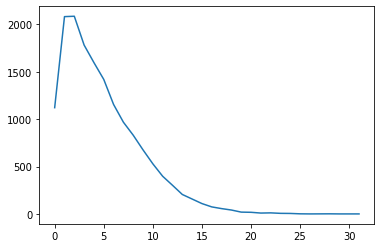

In [33]:
predictions["diff"].round().value_counts().sort_index().plot()

We can see most of the time our error is pretty low but there's kind of a long tail of error where some of the errors are actually very very high and these are the things that make our mean absolute error a lot higher.

We've built our model, improved our model and taken a look at a few diagnostics to investigate what's happening with our model.
To continue improving the model you can do to improve accuracy is always to add in more predictor columns. You can add in more columns like the average monthly temperature, the average daily temperature or ratios between the two or ratio between the current temperature or current precipitation. You can also take a look at these types of rolling averages and and see if you can compute either different Horizons or different types of rolling predictors. 

Some column with null values were removed initially. We can actually use some of these column, process them a little bit differently and investigate if there is anything useful.
The other thing you can do to improve accuracy is actually to change the model -  you could use xgboost or random forest or a more complicated model that may perform better. More complicated doesn't always mean that it will perform better but it could so it's worth trying that to improve accuracy.